# Bananagrams-related explorations of words

Using the enable wordlist from [puzzlers.org](http://www.puzzlers.org/dokuwiki/doku.php?id=solving:wordlists:about:start&s=enable1):

In [1]:
import os
import re
import sys

from urllib.request import urlopen


def words_from_file(f):
    return [ line.strip().decode() for line in f ]

# url = 'http://www.puzzlers.org/pub/wordlists/ospd.txt'
# with urlopen(url) as f:
#     ospd = words_from_file(f)

# Get enable wordlist
url = 'http://www.puzzlers.org/pub/wordlists/enable1.txt'
with urlopen(url) as f:
    enable = words_from_file(f)
words = enable
len(words)

172823

In [2]:
def _match_slots(word, slots):
    """Check if a word matches substrings at a given index."""
    for idx, subs in slots.items():
        if idx >= 0 and len(word) < (idx + len(subs)):
            return False
        if word[idx:idx+len(subs) or None] != subs:
            return False
    return True

def find_words(length=None, min_length=None, max_length=None,
               slots=None, end=None, start=None, mask=None):
    """Find words matching given criteria
    
    Parameters
    ----------
    
    length: int
        exact length match
    min_length: int
        minimum length of words
    max_length: int
        max length
    start: str
        text at the beginning of the word
    end: str
        text at the end of the word
    mask: str of the form 'a**l*'
        '*'-wildcard matching mask, will find substring with holes
        at any point in the word
    slots: dict(int:str)
        dict of substrings at a given index.
        slots={1:'x'} will match words where word[1] = 'x'
    """
    if mask:
        mask = re.compile(mask.replace('*', '.'))
    for word in words:
        n = len(word)
        if length and n != length:
            continue
        if min_length and n < min_length:
            continue
        if max_length and n > max_length:
            continue
        if end and not word.endswith(end):
            continue
        if start and not word.startswith(start):
            continue
        if slots and not _match_slots(word, slots):
            continue
        if mask and not mask.search(word):
            continue
        yield word

def print_words(word_list):
    """Print word list"""
    n = 0
    for word in word_list:
        n += 1
        print('%30s' % word)
    print("%i words" % n)

12 letter words that start with r and end with d.

In [3]:
print_words(find_words(length=12, start='r', end='d'))

                  radiographed
                  radiolabeled
                  ratiocinated
                  rationalised
                  rationalized
                  reaccredited
                  reacquainted
                  reafforested
                  reaggregated
                  reattributed
                  reauthorized
                  recalculated
                  recalibrated
                  rechallenged
                  rechannelled
                  rechristened
                  reciprocated
                  recirculated
                  reclassified
                  reconfigured
                  reconnoitred
                  reconsidered
                  recriminated
                  recultivated
                  redetermined
                  rediscounted
                  rediscovered
                  redistricted
                  reduplicated
                  reemphasized
                  reengineered
                  reformulated
        

12 letter words that start with 'r' and end with 'd',
identifying the ones that are made up of 're-[word]-ed'

In [4]:
subwords = 0
not_subwords = 0

for word in find_words(end='d', length=12, start='r'):
    if not word.startswith('re') and word.endswith('ed'):
        print(word)
        not_subwords += 1
        continue
    
    subword1 = word[2:-2]
    subword2 = word[2:-1]
    if subword1 in words:
        subwords += 1
        print('re-' + subword1 + '-ed')
    elif subword2 in words:
        subwords += 1
        print('re-' + subword2 + '-d')
    else:
        not_subwords += 1
        print(word)

print(subwords, not_subwords, subwords + not_subwords)

radiographed
radiolabeled
ratiocinated
rationalised
rationalized
re-accredit-ed
re-acquaint-ed
re-afforest-ed
re-aggregate-d
re-attribute-d
re-authorize-d
re-calculate-d
re-calibrate-d
re-challenge-d
rechannelled
re-christen-ed
reciprocated
re-circulate-d
reclassified
re-configure-d
reconnoitred
re-consider-ed
re-criminate-d
re-cultivate-d
re-determine-d
re-discount-ed
re-discover-ed
re-district-ed
re-duplicate-d
re-emphasize-d
re-engineer-ed
re-formulate-d
refrigerated
regionalized
regurgitated
re-hypnotize-d
reidentified
re-incarnate-d
re-innervate-d
re-inoculate-d
re-institute-d
re-integrate-d
re-introduce-d
re-keyboard-ed
re-landscape-d
relinquished
re-lubricate-d
remonstrated
rencountered
rendezvoused
re-negotiate-d
re-normalize-d
re-orientate-d
re-position-ed
re-privatize-d
re-programme-d
re-register-ed
re-segregate-d
re-sensitize-d
re-socialize-d
resolidified
re-stabilize-d
re-stimulate-d
re-structure-d
resuscitated
re-translate-d
retrogressed
retrospected
re-vaccinate-d
reverbe

Words that end in '-ship' of length at least 10

In [5]:
print_words(find_words(end='ship', min_length=10))

                accountantship
              acquaintanceship
                    airmanship
                ambassadorship
                anticensorship
                   apostleship
                apprenticeship
                   artisanship
                 assistantship
                 associateship
                   athwartship
                  attorneyship
                    authorship
                   bailiffship
                    battleship
                bipartisanship
                  brinkmanship
                 brinksmanship
                   captainship
                  cardinalship
                    censorship
                  chairmanship
                  championship
                chancellorship
                 chieftainship
                 churchmanship
                   citizenship
                  coauthorship
                 colleagueship
                 collectorship
                 commandership
              commissionership
        

Words of length at least 8, ending with 'p', where the 6th letter from the end is 'r':

In [6]:
print_words(find_words(end='p', min_length=8, slots={-6: 'r'}))

                      airstrip
                   athwartship
                     carrottop
                     clerkship
                     courtship
                   dipterocarp
                      earlship
                    externship
                      firedamp
                      firetrap
                      guruship
                      hardship
                    intergroup
                    internship
                    intertroop
                   lectureship
                      lordship
                     microchip
                  overlordship
                     oversleep
                     overtrump
                      paradrop
                      pericarp
                  postworkshop
                 secretaryship
                     sharecrop
                     shortstop
                     sporocarp
                   stewardship
                     storeship
                    supergroup
                    supersharp
        

All words with 'x' two letters before 'y', with max length 6:

In [7]:
print_words(find_words(mask='x**y', max_length=6))

                        fixity
                        foxily
                        laxity
                        luxury
                        saxony
                        sexily
                        waxily
                         xylyl
                        xylyls
9 words


All words with 'q' and not 'qu':

In [8]:
haveq = [ w for w in words if 'q' in w ]
qnou = [ w for w in haveq if 'qu' not in w ]
qnou

['buqsha',
 'buqshas',
 'faqir',
 'faqirs',
 'qaid',
 'qaids',
 'qanat',
 'qanats',
 'qat',
 'qats',
 'qindar',
 'qindarka',
 'qindars',
 'qintar',
 'qintars',
 'qiviut',
 'qiviuts',
 'qoph',
 'qophs',
 'qwerty',
 'qwertys',
 'sheqalim',
 'sheqel',
 'suq',
 'suqs',
 'tranq',
 'tranqs',
 'umiaq',
 'umiaqs']

# Distribution of word lengths

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    print("No seaborn, plots will be less pretty")
    pass

In [10]:
lengths = np.array([len(w) for w in words])
lengths.sort()
counts = np.bincount(lengths)
total_counts = np.cumsum(counts)
total_counts
counts_at_least_n = len(words) - total_counts
counts_at_least_n

array([172823, 172823, 172727, 171755, 167852, 159216, 143984, 120875,
        92455,  67582,  47280,  31776,  20418,  12591,   7464,   4272,
         2329,   1202,    608,    279,    119,     57,     27,     14,
            5,      3,      3,      1,      0])

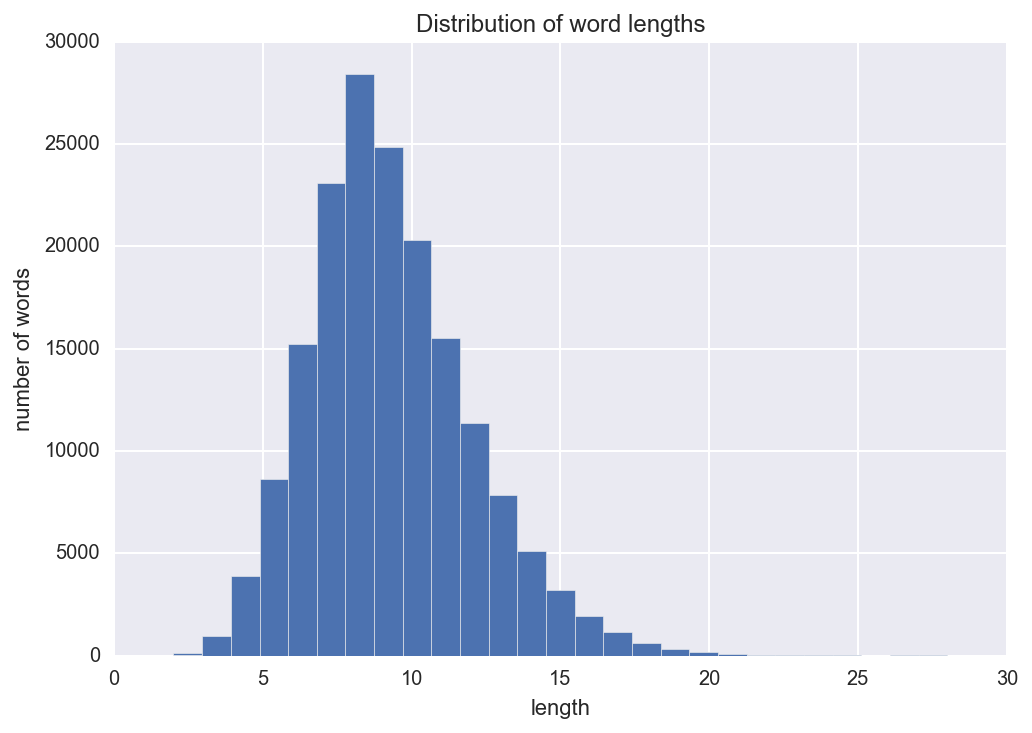

In [11]:
plt.hist(lengths, bins=len(counts)-2)
plt.xlabel("length")
plt.ylabel("number of words")
plt.title("Distribution of word lengths");

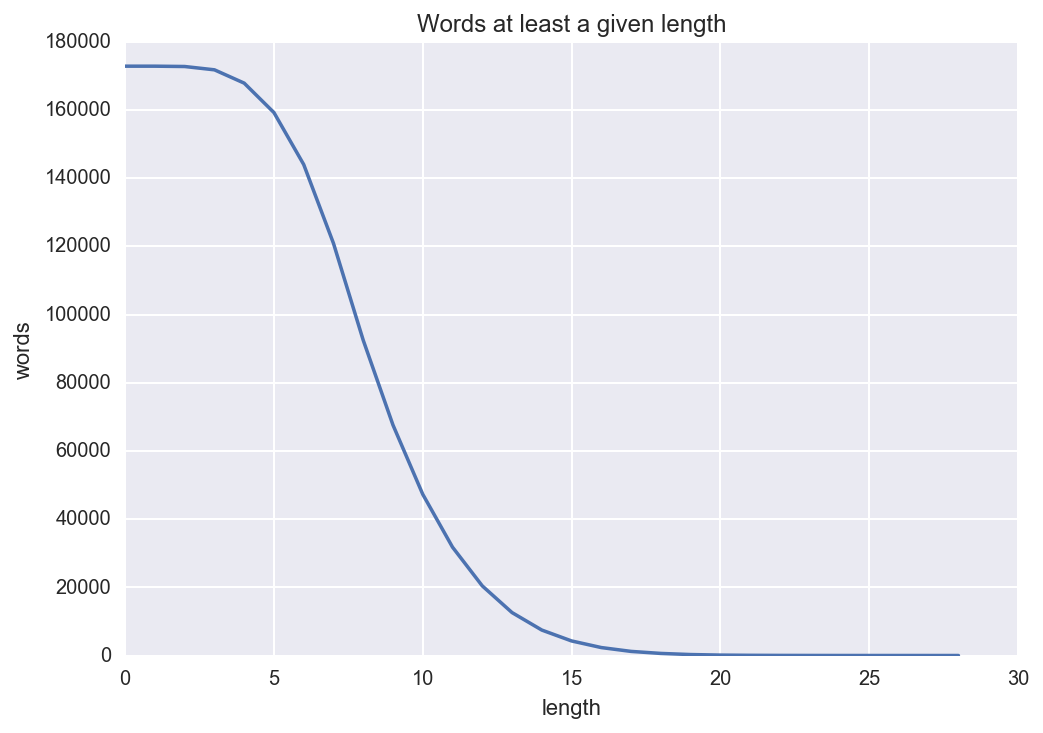

In [12]:
plt.plot(counts_at_least_n)
plt.title("Words at least a given length")
plt.xlabel("length")
plt.ylabel("words");

Zooming in on the tail:

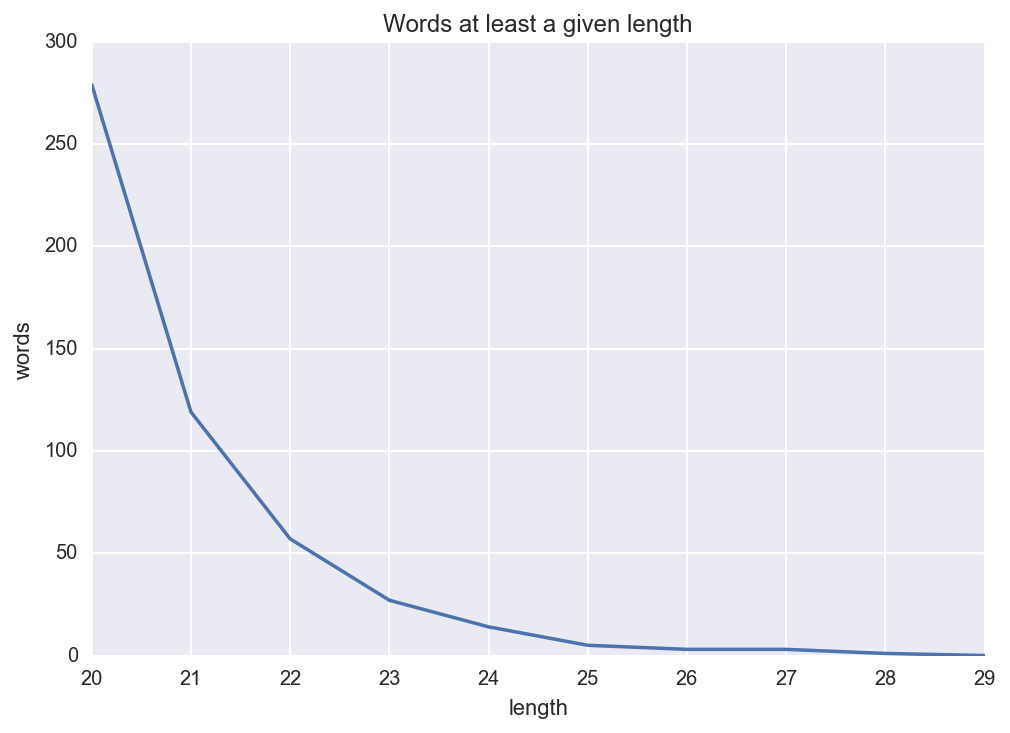

In [13]:
n=20
plt.plot(1 + np.arange(n-1, len(counts_at_least_n)), counts_at_least_n[n-1:])
plt.title("Words at least a given length")
plt.xlabel("length")
plt.ylabel("words");

So there are 120 words of at least 21 characters, and ~25 at least 24.
The longest word is 28 characters.

These are the longest 100 words:

In [14]:
long_words = sorted(words, key=len)
print_words(long_words[-100:])

         electroencephalograph
         electromyographically
         electroretinographies
         establishmentarianism
         extraterritorialities
         hypercholesterolemias
         hypersusceptibilities
         immunocytochemistries
         immunoelectrophoreses
         immunoelectrophoresis
         immunoelectrophoretic
         incomprehensibilities
         indistinguishableness
         institutionalizations
         interchangeablenesses
         interconvertibilities
         internationalizations
         intersubstitutability
         meningoencephalitides
         microminiaturizations
         multidimensionalities
         neuroendocrinological
         neuroendocrinologists
         nondenominationalisms
         otorhinolaryngologies
         otorhinolaryngologist
         overcommercialization
         overintellectualizing
         phosphoglyceraldehyde
         photolithographically
         photophosphorylations
         pseudocholinesterases
        

All the words of at least 20 characters:

In [15]:
print_words(find_words(min_length=21))

         acetylcholinesterases
         adrenocorticosteroids
         adrenocorticotrophins
         anthropomorphizations
         antiauthoritarianisms
         antiferromagnetically
         buckminsterfullerenes
        carboxymethylcellulose
       carboxymethylcelluloses
         clinicopathologically
         compartmentalizations
         constitutionalization
        constitutionalizations
         contemporaneousnesses
         countercountermeasure
        countercountermeasures
         counterdemonstrations
         counterinterpretation
        counterinterpretations
        counterrevolutionaries
        deinstitutionalization
       deinstitutionalizations
         dendrochronologically
       dichlorodifluoromethane
      dichlorodifluoromethanes
         disadvantageousnesses
         disestablishmentarian
        disestablishmentarians
      electrocardiographically
         electrocardiographies
         electroencephalograms
         electroencephalograph
       e